In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from matplotlib import pyplot as plt

In [7]:
def bootstrap(data, n):
    return np.random.choice(data, size=n)

def random_forest(n_trees, asd):
    RandomForestClassifier(n_estimators=n_trees)

# Data

In [24]:
train = pd.read_csv('landsat_train.csv', header=None)
train_y = train.iloc[:, 0]
train_x = train.iloc[:, 1:]

test = pd.read_csv('landsat_validation.csv', header=None)
test_y = test.iloc[:, 0]
test_x = test.iloc[:, 1:]

# Fit Random Forest

In [26]:
n_trees = 10
rf = RandomForestClassifier(n_estimators=n_trees, bootstrap=True, 
    criterion='gini', max_features=None)\
    .fit(train_x, train_y)

# Run predictions

In [29]:
rf.score(test_x, test_y)

0.7511324854480299

# Display feature importance

In [30]:
feature_imp = pd.Series(rf.feature_importances_, index = ["d1", "d2", "d3", "d4", "d5", "d6", "d7", "d8", "d9"]).sort_values(ascending = False)
feature_imp

d4    0.821449
d7    0.037321
d8    0.028126
d6    0.024260
d5    0.021134
d3    0.020377
d2    0.018096
d1    0.016169
d9    0.013067
dtype: float64

# Visualize predictions

In [31]:
landsat_area = pd.read_csv('landsat_area.csv', header=None)

In [32]:
landsat_area_pred = rf.predict(landsat_area)
img = np.reshape(landsat_area_pred, (-1, 3000))

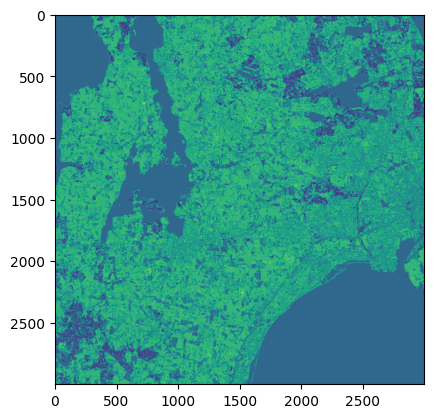

In [37]:
plt.imshow(img)
plt.savefig("images/rf_pred.png")